<a href="https://colab.research.google.com/github/Abdelrhman129/my-_colab_notbook/blob/main/%D8%AA%D9%88%D9%82%D8%B9_%D8%B3%D8%B9%D8%B1_%D8%A7%D9%84%D8%A8%D9%8A%D9%88%D8%AA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#selected Liberaryes


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import fetch_california_housing

#Data Frame

In [2]:
housing=fetch_california_housing()
df=pd.DataFrame(housing.data,columns=housing.feature_names)
df['price']=housing.target
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


#visulization_feature

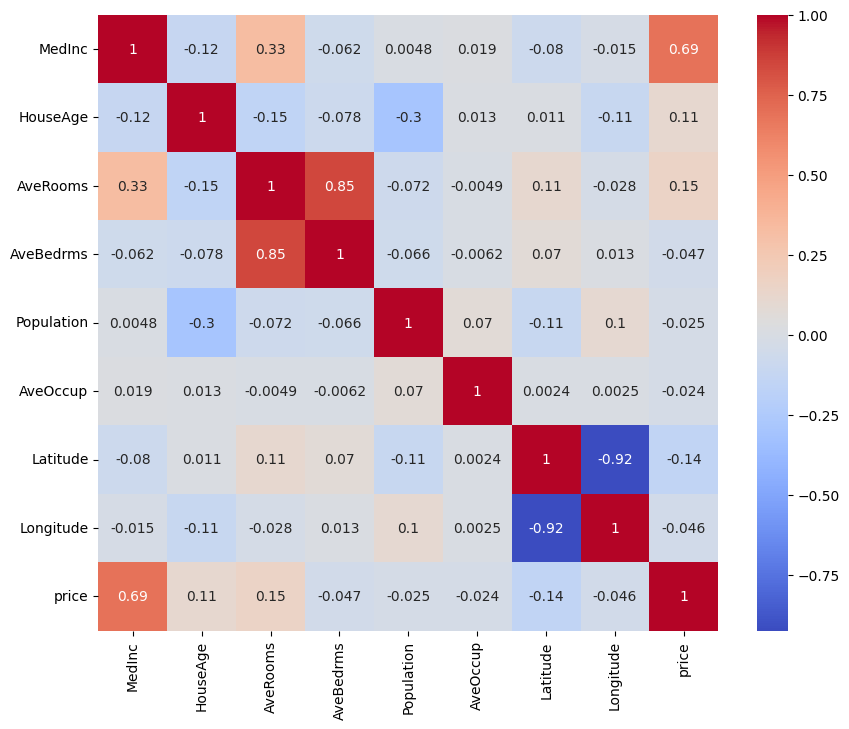

In [3]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()


#Selection Feature , Targit

In [4]:
Select_Feature=["MedInc","AveRooms","HouseAge","Latitude","AveOccup"]

In [5]:
x=df[Select_Feature]
y=df["price"]

#Train ,Test

In [6]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [7]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [8]:
y_pridect=model.predict(x_test)

#Y_Pridection

In [9]:
y_pridect

array([1.05038269, 1.53631311, 2.23613307, ..., 4.24518176, 1.67116299,
       1.82366329])

#Mean SquareErrore

In [10]:
MSE=mean_squared_error(y_test,y_pridect)
MSE

0.6479945669253745

#r2_score

In [11]:
r2=r2_score(y_test,y_pridect)
r2

0.5055020396798211

#📌 الخلاصة:

الموديل عندك مقبول كبداية لكنه مش دقيق جدًا.

الخطأ كبير نسبيًا (≈ 81 ألف دولار).

R² حوالي 0.5 = تفسير متوسط للبيانات.

#للتجربه


In [12]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

# 1) تحميل البيانات
housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df["Price"] = housing.target

X = df.drop("Price", axis=1)
y = df["Price"]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ============ 1. Linear Regression العادي ============
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)
y_pred = lin_reg.predict(x_test)

print("Linear Regression:")
print("MSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))
print("="*50)

# ============ 2. Linear Regression + Scaling ============
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

lin_reg.fit(x_train_scaled, y_train)
y_pred_scaled = lin_reg.predict(x_test_scaled)

print("Linear Regression + Scaling:")
print("MSE:", mean_squared_error(y_test, y_pred_scaled))
print("R²:", r2_score(y_test, y_pred_scaled))
print("="*50)

# ============ 3. Linear Regression + Polynomial Features ============
poly = PolynomialFeatures(degree=2)  # جرب 2 أو 3
x_train_poly = poly.fit_transform(x_train_scaled)
x_test_poly = poly.transform(x_test_scaled)

lin_reg.fit(x_train_poly, y_train)
y_pred_poly = lin_reg.predict(x_test_poly)

print("Linear Regression + Polynomial Features (degree=2):")
print("MSE:", mean_squared_error(y_test, y_pred_poly))
print("R²:", r2_score(y_test, y_pred_poly))
print("="*50)


Linear Regression:
MSE: 0.5558915986952444
R²: 0.5757877060324508
Linear Regression + Scaling:
MSE: 0.5558915986952442
R²: 0.575787706032451
Linear Regression + Polynomial Features (degree=2):
MSE: 0.46430152383012785
R²: 0.6456819729261861
